#### **Importing libraries**

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster


from sklearn.metrics import silhouette_score

plt.rcParams['figure.figsize'] = [12, 10]

#### **Read data from file**

In [10]:
data = pd.read_csv("data10.txt", header=None, sep="   ");
data.columns = [f"Var{i}" for i in range(data.shape[1])]
data.head()

C:\Users\Arseny\AppData\Local\Temp\ipykernel_4744\4280563261.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("data10.txt", header=None, sep="   ");


,Var0,Var1
0,0.641223,0.728845
1,0.601061,0.423773
2,0.510695,0.318489
3,0.741851,0.211210
4,0.660301,0.741290


#### **Visualize data**

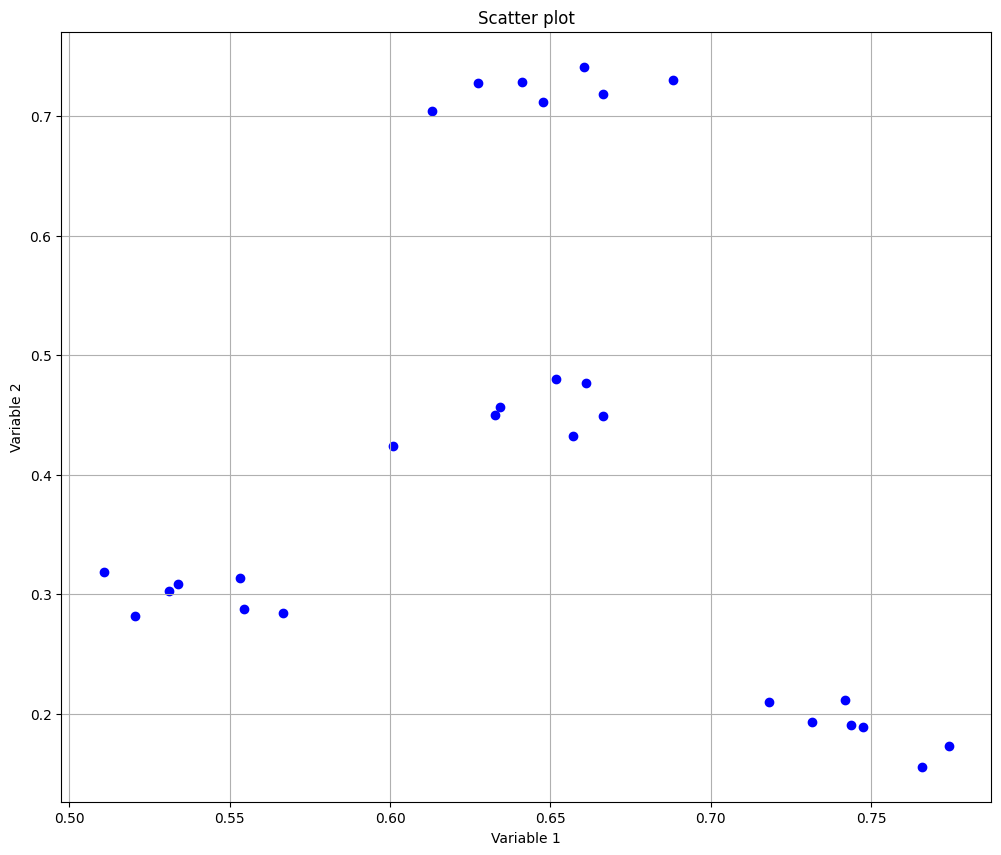

In [11]:
plt.scatter((data.T).iloc[0, :], (data.T).iloc[1, :], c="blue")
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.title("Scatter plot")
plt.grid()

#### **Make metric functions (Euclidian, standard Euclidian, Chebyshev)**

In [12]:
def euclidean_distance(x, y):
    """
    Calculates the Euclidean distance between two vectors x and y. 
    Parameters: 
    x (numpy array): Vector of size n 
    y (numpy array): Vector of size n 
    Returns: 
    dist (float): Euclidean distance between x and y. 
    """
    # calculate the difference between the two vectors 
    # square each element in the difference vector 
    # sum all elements in the squared difference vector 
    # take the square root of the summed squared differences to get Euclidean distance  
    return np.sqrt(np.sum((x - y)**2))

In [13]:
def standard_euclidian_distance(x, y):
    np.sqrt(np.sum((x - y)**2/np.var(np.array([x, y]), axis=0, ddof=0)))

In [14]:
def chebyshev_distance(x, y):
    """
    Calculates the Chebyshev distance between two points x and y.
    
    Parameters: 
    x (numpy array): first point 
    y (numpy array): second point 

    Returns: 
    float: Chebyshev distance between x and y 
    """
    # calculate the difference between each element of x and y 
    # return the maximum of the differences, which is the Chebyshev distance 
    return np.max(np.abs(x - y))

#### **Calculate distances**

In [15]:
distance_array = np.array([pdist(data, metric='euclidean'),
                        pdist(data, metric='seuclidean'),
                        pdist(data, metric='chebyshev')
])
print("chebyshev_distance is:")
pd.DataFrame(squareform(distance_array[2]))

chebyshev_distance is:


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.305072,0.410356,0.517635,0.019078,0.272222,0.447004,0.535921,0.028005,0.248535,...,0.420067,0.518936,0.025159,0.252039,0.415333,0.539559,0.017009,0.278538,0.444505,0.556166
1,0.305072,0.000000,0.105284,0.212563,0.317517,0.033097,0.141932,0.230849,0.280196,0.056537,...,0.114994,0.213864,0.295101,0.059885,0.110261,0.234487,0.288063,0.031738,0.139432,0.251094
2,0.410356,0.105284,0.000000,0.231155,0.422801,0.138134,0.036648,0.220726,0.385480,0.161821,...,0.023321,0.207296,0.400385,0.158317,0.042605,0.236571,0.393347,0.131818,0.056081,0.263531
3,0.517635,0.212563,0.231155,0.000000,0.530080,0.245413,0.221500,0.018286,0.492759,0.269100,...,0.207835,0.023860,0.507664,0.265596,0.188550,0.021924,0.500626,0.239097,0.175075,0.038531
4,0.019078,0.317517,0.422801,0.530080,0.000000,0.284667,0.459449,0.548366,0.047083,0.260980,...,0.432511,0.531381,0.022416,0.264484,0.427778,0.552003,0.029454,0.290982,0.456949,0.568611
5,0.272222,0.033097,0.138134,0.245413,0.284667,0.000000,0.174782,0.263699,0.247346,0.023687,...,0.147844,0.246714,0.262251,0.026788,0.143111,0.267337,0.255213,0.006316,0.172283,0.283944
6,0.447004,0.141932,0.036648,0.221500,0.459449,0.174782,0.000000,0.211071,0.422128,0.198469,...,0.026937,0.197640,0.437033,0.194965,0.032950,0.226916,0.429995,0.168466,0.046426,0.253875
7,0.535921,0.230849,0.220726,0.018286,0.548366,0.263699,0.211071,0.000000,0.511045,0.287386,...,0.197405,0.016985,0.525950,0.283882,0.178120,0.015845,0.518912,0.257384,0.164645,0.042805
8,0.028005,0.280196,0.385480,0.492759,0.047083,0.247346,0.422128,0.511045,0.000000,0.223659,...,0.395190,0.494060,0.053164,0.227163,0.390457,0.514683,0.034441,0.253662,0.419628,0.531290
9,0.248535,0.056537,0.161821,0.269100,0.260980,0.023687,0.198469,0.287386,0.223659,0.000000,...,0.171532,0.270401,0.238564,0.009245,0.166798,0.291024,0.231526,0.030003,0.195970,0.307631


In [16]:
distance_array[2]

array([0.30507237, 0.41035605, 0.51763514, 0.01907801, 0.27222225,
       0.44700409, 0.53592141, 0.02800464, 0.24853503, 0.44137999,
       0.5383361 , 0.04705093, 0.27951375, 0.426336  , 0.5731745 ,
       0.01392312, 0.29640452, 0.42006662, 0.5189365 , 0.02515927,
       0.25203927, 0.41533302, 0.53955892, 0.0170091 , 0.27853786,
       0.44450482, 0.5561663 , 0.10528368, 0.21256277, 0.31751686,
       0.03309725, 0.14193172, 0.23084904, 0.28019602, 0.05653734,
       0.13630762, 0.23326373, 0.30649251, 0.06546114, 0.12126363,
       0.26810213, 0.30411485, 0.05595297, 0.11499425, 0.21386413,
       0.29510124, 0.05988515, 0.11026065, 0.23448655, 0.28806327,
       0.03173778, 0.13943245, 0.25109393, 0.23115539, 0.42280054,
       0.1381338 , 0.03664804, 0.22072568, 0.3854797 , 0.16182102,
       0.04364364, 0.23302644, 0.41177619, 0.15582704, 0.02029459,
       0.25503422, 0.40939853, 0.14631887, 0.02332063, 0.20729554,
       0.40038492, 0.15831678, 0.04260535, 0.23657109, 0.39334

#### **Apply different algorithms with different distances**

In [29]:
linkage_method_names = ["average", "centroid", "median"]

linkage_array = np.array([[linkage(y=j, method=i) for j in distance_array] for i in linkage_method_names])
linkage_array[0][0]

array([[1.10000000e+01, 2.30000000e+01, 3.74964430e-03, 2.00000000e+00],
       [5.00000000e+00, 2.50000000e+01, 6.46026999e-03, 2.00000000e+00],
       [1.40000000e+01, 1.80000000e+01, 6.96146850e-03, 2.00000000e+00],
       [9.00000000e+00, 2.10000000e+01, 9.88669634e-03, 2.00000000e+00],
       [1.00000000e+01, 2.60000000e+01, 1.28237671e-02, 2.00000000e+00],
       [0.00000000e+00, 1.60000000e+01, 1.39560064e-02, 2.00000000e+00],
       [7.00000000e+00, 2.80000000e+01, 1.43965469e-02, 3.00000000e+00],
       [1.50000000e+01, 2.70000000e+01, 1.90122766e-02, 2.00000000e+00],
       [1.30000000e+01, 1.70000000e+01, 1.93830701e-02, 2.00000000e+00],
       [2.00000000e+01, 2.40000000e+01, 2.00016818e-02, 2.00000000e+00],
       [3.00000000e+00, 3.40000000e+01, 2.14732151e-02, 4.00000000e+00],
       [2.20000000e+01, 3.00000000e+01, 2.23667905e-02, 3.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 2.76388313e-02, 3.00000000e+00],
       [3.30000000e+01, 4.00000000e+01, 2.82801173e

#### **Calculating cophenetic correlation**

In [18]:
cophenet_array = np.array([[cophenet(Z=k, Y=q)[0] for k, q in zip(i, distance_array)] for i in linkage_array]);
cophenetic_matrix = pd.DataFrame(cophenet_array, columns=["euclidean", "seuclidean", "chebyshev"], index=linkage_method_names)
cophenetic_matrix

,euclidean,seuclidean,chebyshev
average,0.892344,0.880867,0.898540
centroid,0.891774,0.879422,0.898257
median,0.890530,0.857047,0.896273


#### **Find the best and worth methods**

In [19]:
staff = np.array([np.where(cophenet_array == np.amax(cophenet_array))]).tolist()[0]
staff_ = np.array([np.where(cophenet_array == np.amin(cophenet_array))]).tolist()[0]
a, b = staff[0][0], staff[1][0]
a_, b_ = staff_[0][0], staff_[1][0]
print(f"The best method is: {cophenetic_matrix.columns[b]} distance and {cophenetic_matrix.index[a]} method")
print(f"The worst method is: {cophenetic_matrix.columns[b_]} distance and {cophenetic_matrix.index[a_]} method")

The best method is: chebyshev distance and average method
The worst method is: seuclidean distance and median method


#### **Plotting the dendrogram**

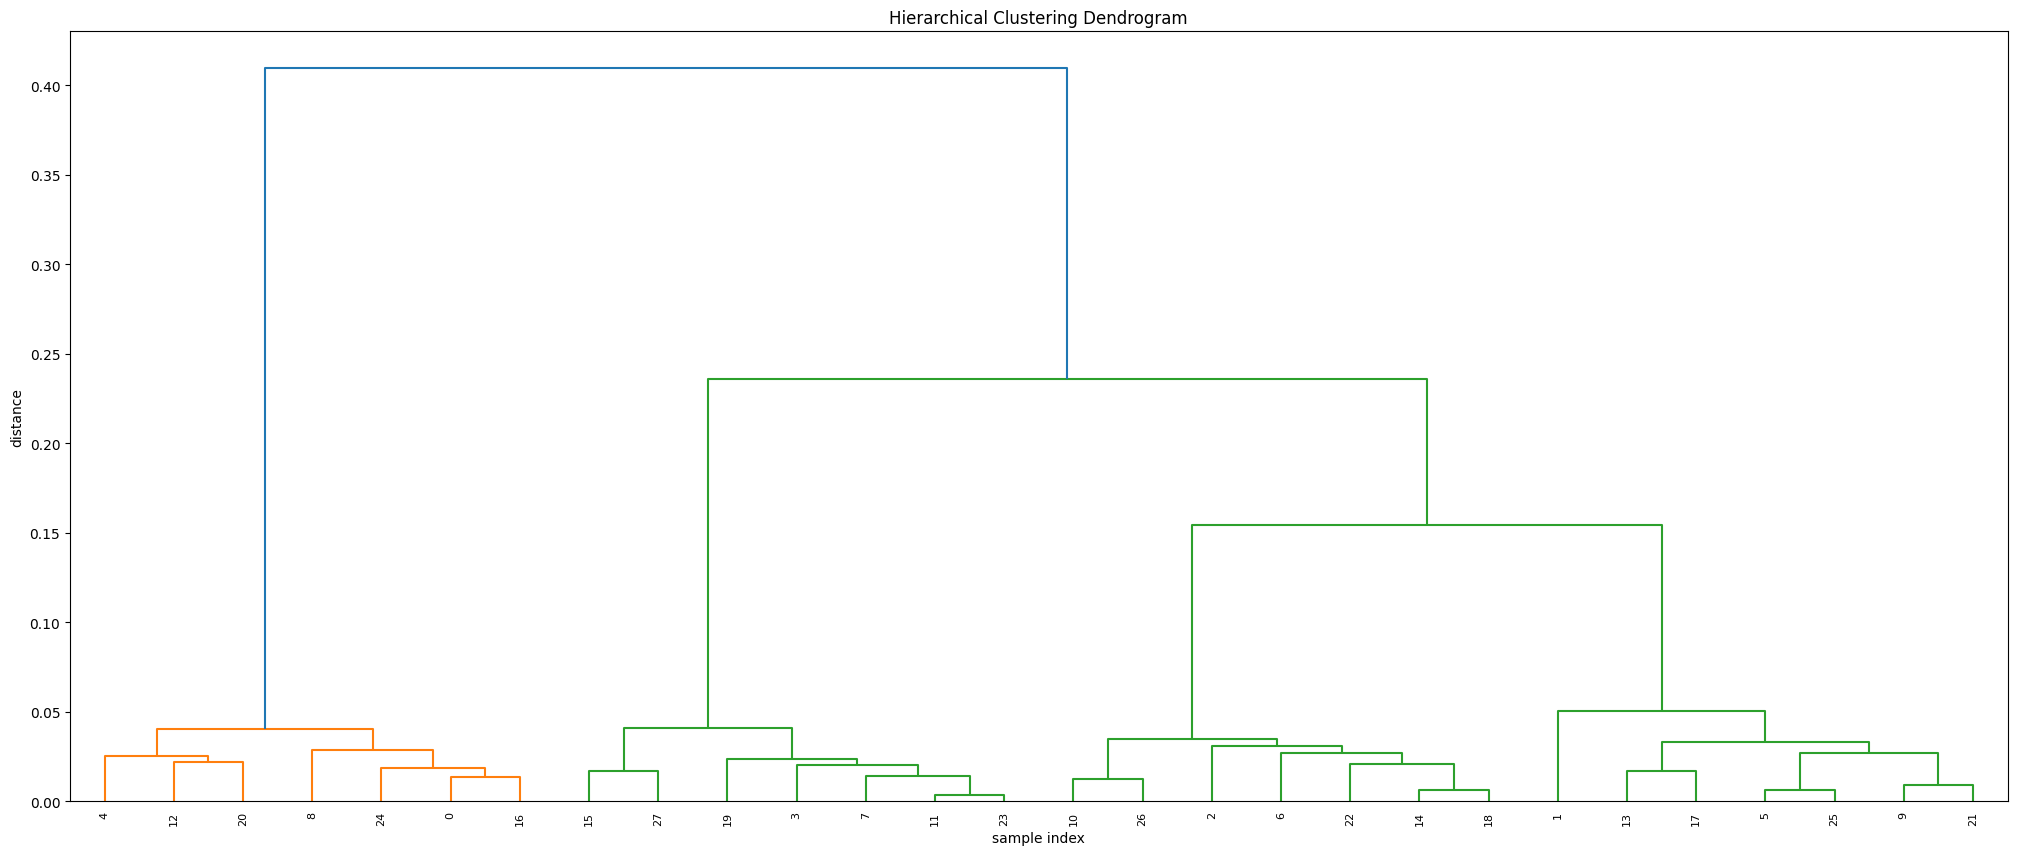

In [20]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linkage_array[a, b],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

#### **Use silhouette method of getting number of clusters**

In [21]:
min_N = 2
max_N = 10
N = np.argmax([silhouette_score(data, fcluster(linkage_array[a][b], i, 'maxclust')) for i in range(min_N, max_N)]) + min_N
N

4

In [30]:
clusters

array([1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4,
       3, 2, 1, 4, 3, 2], dtype=int32)

#### **Visuilize clusters with best method**

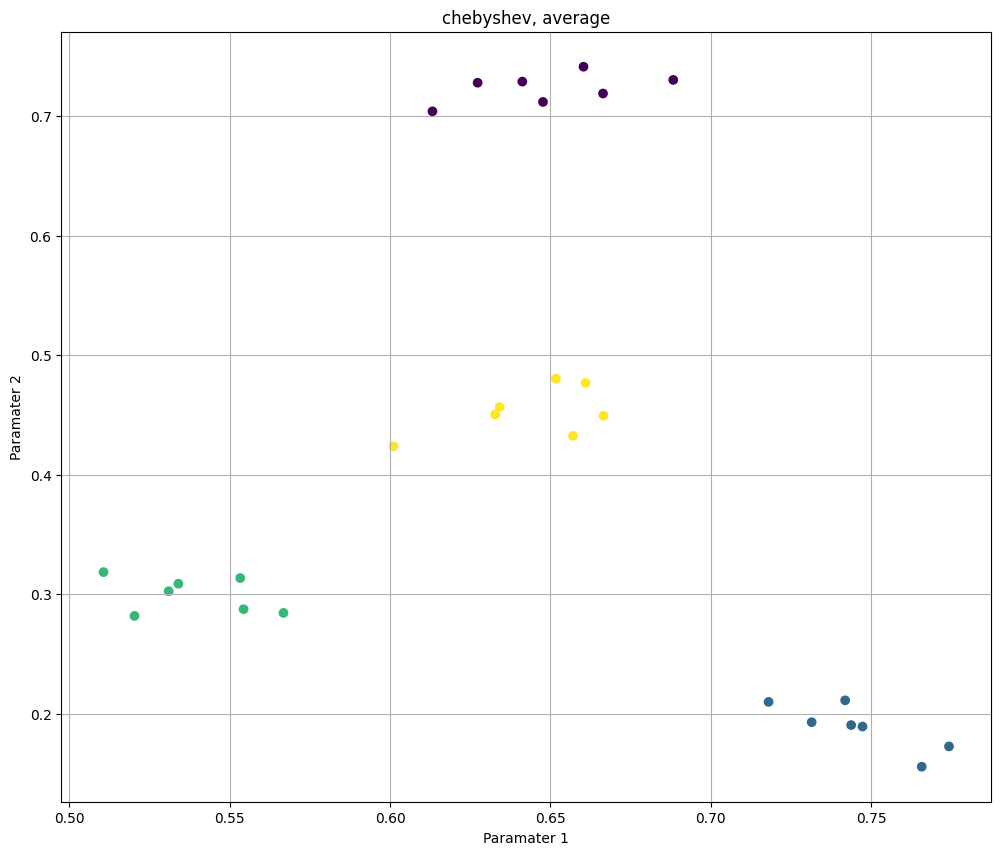

In [22]:
clusters = fcluster(linkage_array[a][b], N, 'maxclust')
plt.scatter((data.T).iloc[0, :], (data.T).iloc[1, :], c=clusters)
plt.title(f"{cophenetic_matrix.columns[b]}, {cophenetic_matrix.index[a]}")
plt.xlabel("Paramater 1")
plt.ylabel("Paramater 2")
plt.grid()

#### **Get clusters with centers**

In [23]:
number_of_classes = set((clusters).tolist())
elements_in_clusters = np.array([data.iloc[np.where(clusters == i)].to_numpy() for i in number_of_classes])
elements_in_clusters

array([[[0.64122275, 0.72884529],
        [0.66030076, 0.74128978],
        [0.61321811, 0.70396894],
        [0.68827368, 0.73026543],
        [0.62729963, 0.72788777],
        [0.66638202, 0.71887416],
        [0.64765946, 0.71183619]],

       [[0.74185051, 0.21121015],
        [0.7314208 , 0.19292388],
        [0.74372156, 0.19050919],
        [0.76572934, 0.15567079],
        [0.71799066, 0.20990879],
        [0.74726621, 0.18928637],
        [0.77422568, 0.17267899]],

       [[0.51069512, 0.31848924],
        [0.52035019, 0.2818412 ],
        [0.55433876, 0.2874653 ],
        [0.53098971, 0.30250929],
        [0.53401575, 0.30877867],
        [0.55330047, 0.31351227],
        [0.56677598, 0.28434047]],

       [[0.60106102, 0.42377292],
        [0.63415827, 0.45662304],
        [0.65170133, 0.48031026],
        [0.66652216, 0.44933154],
        [0.65701399, 0.43244077],
        [0.66094617, 0.47680602],
        [0.6327988 , 0.45030743]]])

In [24]:
centroids = np.array([[i[:, 0].mean(), i[:, 1].mean()] for i in elements_in_clusters])
centroids

array([[0.64919377, 0.72328108],
       [0.74602925, 0.18888402],
       [0.538638  , 0.29956235],
       [0.64345739, 0.45279885]])

In [31]:
pdist(centroids, metric='euclidean')

array([0.54309974, 0.43790426, 0.27054305, 0.23507621, 0.28314665,
       0.18565703])

In [25]:
inter_variance = np.array([np.sqrt((i[:, 0].var())**2 + (i[:, 1].var()))**2 for i in elements_in_clusters])
print(f"The inter variance in clusters are: {inter_variance}")

The inter variance in clusters are: [0.00013581 0.00033229 0.00019134 0.00037491]


In [26]:
distances = np.array([np.linalg.norm(i-j, axis=1) for i, j in zip(elements_in_clusters, centroids)])
print(f"Distances are: {distances}")

Distances are: [[0.00972099 0.02115841 0.04083145 0.03969912 0.02237354 0.0177442
  0.01154728]
 [0.02271382 0.01515676 0.00282252 0.03861622 0.03504573 0.00130075
  0.0325214 ]
 [0.03374954 0.02546533 0.01982051 0.00819639 0.01031047 0.02023829
  0.03199143]
 [0.05138051 0.01005475 0.02872003 0.02332393 0.0244588  0.02970188
  0.0109459 ]]


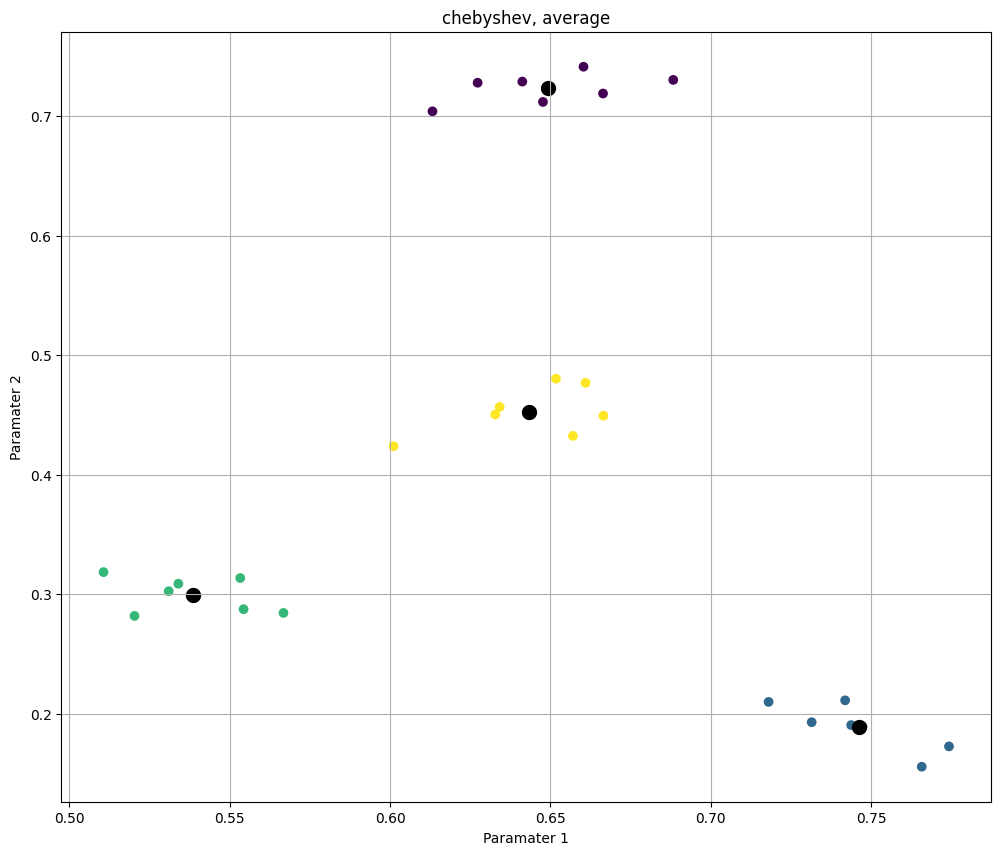

In [27]:
plt.scatter((data.T).iloc[0, :], (data.T).iloc[1, :], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", linewidths=5)
plt.title(f"{cophenetic_matrix.columns[b]}, {cophenetic_matrix.index[a]}")
plt.xlabel("Paramater 1")
plt.ylabel("Paramater 2")
plt.grid()

#### **Plotting data points and compare each algorithm with each other**

C:\Users\Arseny\AppData\Local\Temp\ipykernel_4744\2828237593.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  elements_in_clusters = np.array([data.iloc[np.where(clusters == i)].to_numpy() for i in range(N+1)]);
C:\Users\Arseny\AppData\Local\Temp\ipykernel_4744\2828237593.py:7: RuntimeWarning: Mean of empty slice.
  centroid = np.array([[k[:, 0].mean(), k[:, 1].mean()] for k in elements_in_clusters]);
c:\Users\Arseny\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


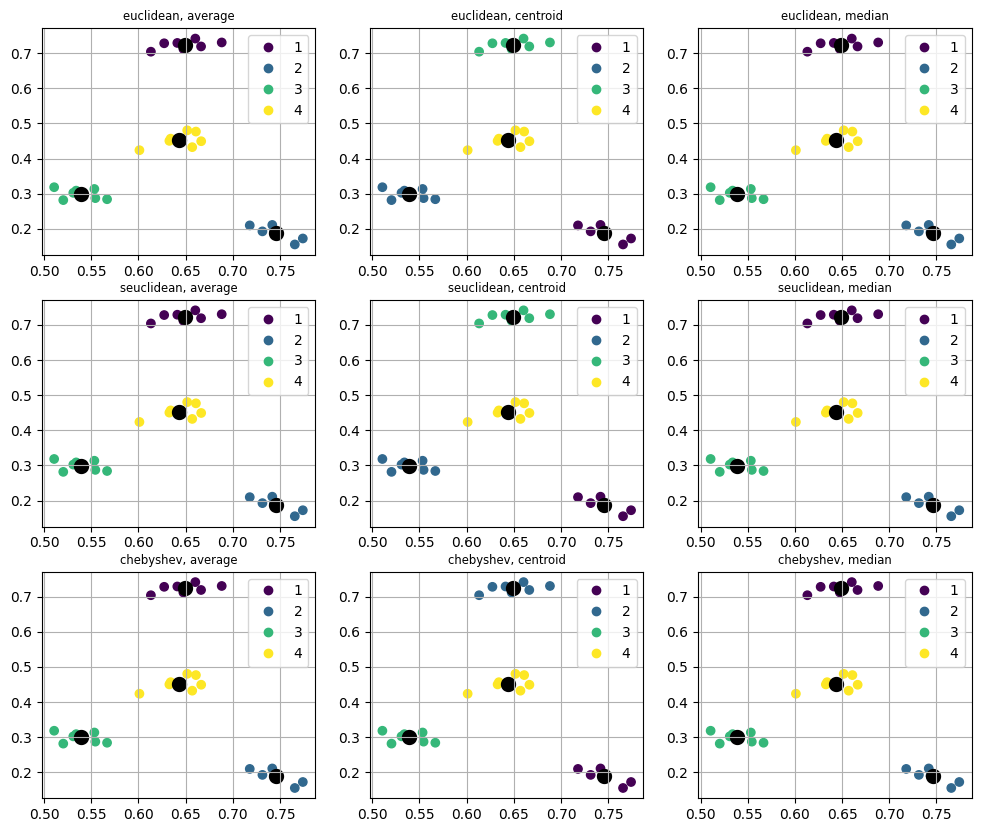

In [28]:
figure, axis = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        cluster = fcluster(linkage_array[i][j], N, 'maxclust')
        sc = axis[i, j].scatter(data.iloc[:, 0], data.iloc[:, 1], c=cluster)
        elements_in_clusters = np.array([data.iloc[np.where(clusters == i)].to_numpy() for i in range(N+1)]);
        centroid = np.array([[k[:, 0].mean(), k[:, 1].mean()] for k in elements_in_clusters]);
        axis[i, j].scatter(centroid[:, 0], centroid[:, 1], c="black", linewidths=5);
        axis[i, j].grid()
        axis[i, j].legend(*sc.legend_elements())
        axis[i, j].set_title(f"{cophenetic_matrix.columns[i]}, {cophenetic_matrix.index[j]}", size="small")

##### **This graphs shows that we can't guess what is the best algorithm by eye**